<a href="https://www.kaggle.com/monishkumarvr/cardekho-car-price-prediction?scriptVersionId=85958120" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars-dataset-from-cardekhocom/Cardekho_Extract.csv
/kaggle/input/used-cars-dataset-from-cardekhocom/cardekho_updated.csv
/kaggle/input/used-cars-dataset-from-cardekhocom/cardekho_imputated.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/used-cars-dataset-from-cardekhocom/cardekho_imputated.csv")

In [4]:
df.head()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
df.drop("Unnamed: 0", axis =1, inplace = True)

In [6]:
df

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,6.983200e+05,7.293333e+05,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,9.267760e+05,1.149968e+06,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,8.926327e+05,1.563551e+06,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,1.783000e+06,2.491000e+06,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   min_cost_price     15411 non-null  float64
 4   max_cost_price     15411 non-null  float64
 5   vehicle_age        15411 non-null  int64  
 6   km_driven          15411 non-null  int64  
 7   seller_type        15411 non-null  object 
 8   fuel_type          15411 non-null  object 
 9   transmission_type  15411 non-null  object 
 10  mileage            15411 non-null  float64
 11  engine             15411 non-null  int64  
 12  max_power          15411 non-null  float64
 13  seats              15411 non-null  int64  
 14  selling_price      15411 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 1.8+ MB


In [8]:
df.describe(include = 'all')

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
count,15411,15411,15411,1.541100e+04,1.541100e+04,15411.000000,1.541100e+04,15411,15411,15411,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
unique,121,32,120,NaN,NaN,NaN,NaN,3,5,2,NaN,NaN,NaN,NaN,NaN
top,Hyundai i20,Maruti,i20,NaN,NaN,NaN,NaN,Dealer,Petrol,Manual,NaN,NaN,NaN,NaN,NaN
freq,906,4992,906,NaN,NaN,NaN,NaN,9539,7643,12225,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.892971e+06,1.962624e+06,6.036338,5.561648e+04,NaN,NaN,NaN,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,NaN,NaN,NaN,5.669851e+07,2.889636e+06,3.013291,5.161855e+04,NaN,NaN,NaN,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,NaN,NaN,NaN,3.110000e+05,4.360000e+05,0.000000,1.000000e+02,NaN,NaN,NaN,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,NaN,NaN,NaN,6.680000e+05,8.728667e+05,4.000000,3.000000e+04,NaN,NaN,NaN,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,NaN,NaN,NaN,8.550000e+05,1.206000e+06,6.000000,5.000000e+04,NaN,NaN,NaN,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,NaN,NaN,NaN,1.284000e+06,1.743000e+06,8.000000,7.000000e+04,NaN,NaN,NaN,22.700000,1582.000000,117.300000,5.000000,8.250000e+05


In [9]:
df['vehicle_age'].value_counts().head(10)

4     2252
5     2117
3     1926
6     1924
7     1438
8     1282
2     1145
9     1027
10     710
11     551
Name: vehicle_age, dtype: int64

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Ford Ecosport         374
Volkswagen Polo       373
Maruti Baleno         364
Honda Amaze           362
Maruti Ciaz           346
Maruti Ertiga         343
Hyundai Creta         336
Mahindra XUV500       330
Renault KWID          306
Maruti Vitara         295
Name: car_name, dtype: int64


<AxesSubplot:>

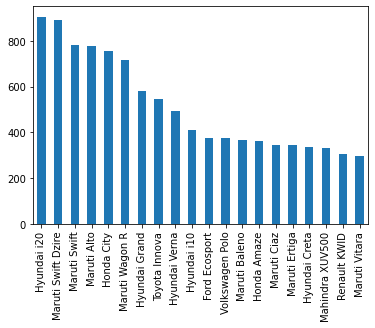

In [10]:
print(df.car_name.value_counts()[0:20])
df.car_name.value_counts()[0:20].plot(kind = 'bar')

In [11]:
df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()

543603.7527593819

In [12]:
df[df['car_name'] == 'Maruti Swift Dzire']['selling_price'].mean()

525888.7640449438

In [13]:
df.car_name.value_counts().tail(10)

Maruti Dzire LXI         2
Isuzu MUX                1
Maserati Quattroporte    1
Rolls-Royce Ghost        1
Maserati Ghibli          1
Mercedes-AMG C           1
Tata Altroz              1
Ferrari GTC4Lusso        1
Hyundai Aura             1
Force Gurkha             1
Name: car_name, dtype: int64

<AxesSubplot:>

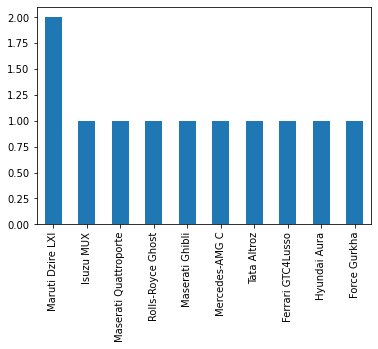

In [14]:
df.car_name.value_counts().tail(10).plot(kind = 'bar')

## Hyundai i20 is the most sold used car of about = 906 units with average selling price = Rs. 5,43,603
## Maruti Swift Dzire is the second most sold used car of about = 890 units with average selling price = Rs. 5,25,888

<AxesSubplot:>

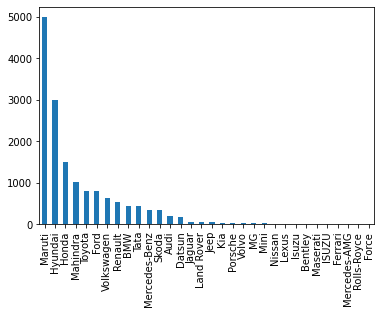

In [15]:
df.brand.value_counts().plot(kind = 'bar')

<AxesSubplot:>

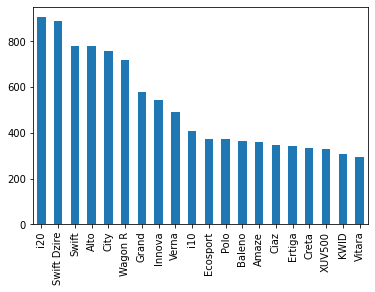

In [16]:
df.model.value_counts()[0:20].plot(kind = 'bar')

In [17]:
df.brand.value_counts()

Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: brand, dtype: int64

<AxesSubplot:xlabel='brand'>

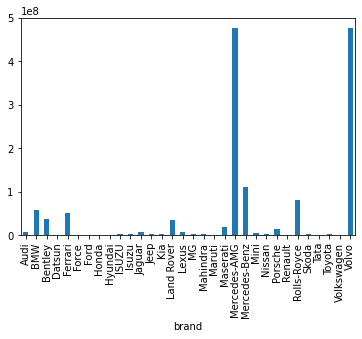

In [18]:
df.groupby(['brand'])['min_cost_price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='brand'>

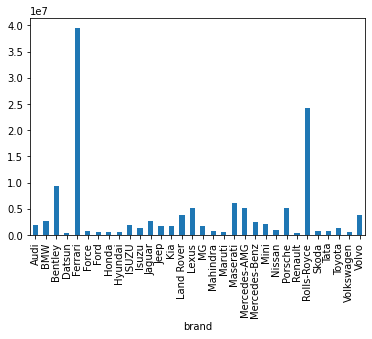

In [19]:
df.groupby(['brand'])['selling_price'].mean().plot(kind = 'bar')

In [20]:
df[df['brand'] == 'Ferrari']['selling_price'].mean()

39500000.0

In [21]:
df[df['brand'] == 'Rolls-Royce']['selling_price'].mean()

24200000.0

## Ferrari has the best selling price for a used car = Rs.3,95,00,000
## Rools-Royce sttod second with price = Rs. 2,42,00,000

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='selling_price'>

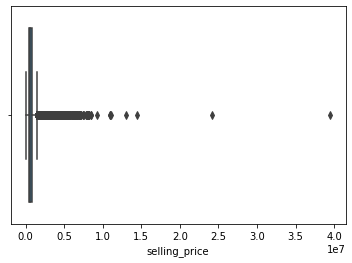

In [22]:
sns.boxplot(df['selling_price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='min_cost_price'>

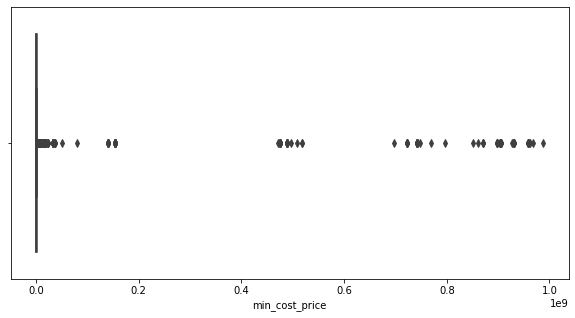

In [23]:
plt.figure(figsize = (10,5))
sns.boxplot(df['min_cost_price'])

<AxesSubplot:xlabel='brand'>

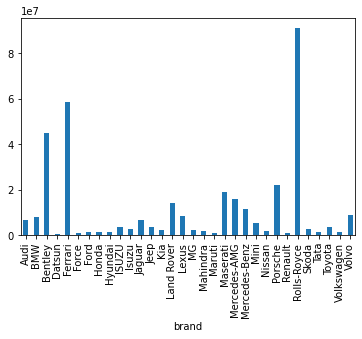

In [24]:
df.groupby(['brand'])['max_cost_price'].mean().plot(kind = 'bar')

In [25]:
df['min_cost_price'].min(), df['min_cost_price'].max()

(311000.0, 988000000.0)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='min_cost_price', ylabel='Density'>

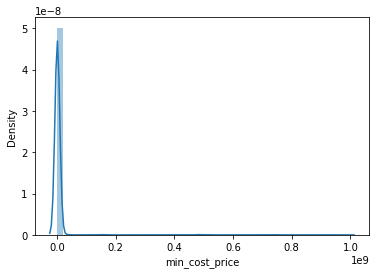

In [26]:
sns.distplot(df['min_cost_price'])

Check for Normality - Shapiro Test

H0 : Price is normally distributed

In [27]:
from scipy.stats import shapiro
shapiro(df['min_cost_price'])

/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.06165975332260132, pvalue=0.0)

As we can see the pvalue is less than 0.05. So we can reject the null hypothesis that price is normally distributed. We will use log transformation for converting price to normal distribution

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='max_cost_price'>

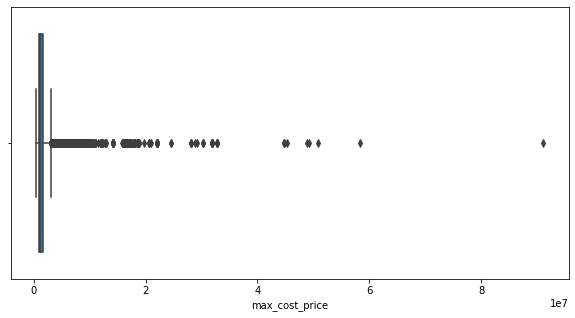

In [28]:
plt.figure(figsize = (10,5))
sns.boxplot(df['max_cost_price'])

In [29]:
df['max_cost_price'].min(), df['max_cost_price'].max()

(436000.0, 91100000.0)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_cost_price', ylabel='Density'>

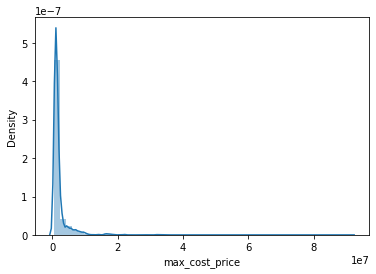

In [30]:
sns.distplot(df['max_cost_price'])

In [31]:
shapiro(df['max_cost_price'])

/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.4195765256881714, pvalue=0.0)

As we can see the pvalue is less than 0.05. So we can reject the null hypothesis that price is normally distributed. We will use log transformation for converting price to normal distribution

<AxesSubplot:>

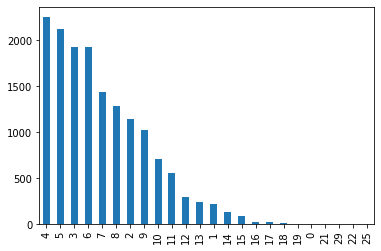

In [32]:
df['vehicle_age'].value_counts().plot(kind = 'bar')

## People prefer buying used cars under 10 years mostly

<AxesSubplot:xlabel='brand'>

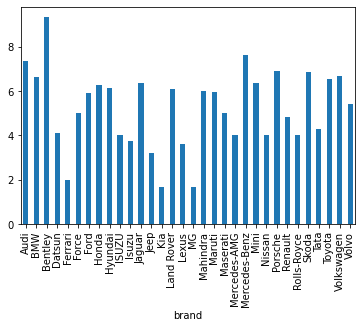

In [33]:
df.groupby(['brand'])['vehicle_age'].mean().plot(kind = 'bar')

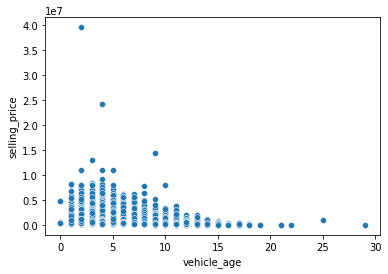

In [34]:
sns.scatterplot(data = df, x = df.vehicle_age, y = df.selling_price)
plt.show()

## We can observe that as vehicle's age increases the selling price of the used car decreases. This shows that, motive for buying used cars is for general use and not for its antiquity

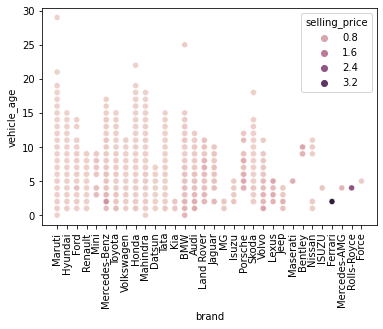

In [35]:
sns.scatterplot(data = df, x = df.brand, y = df.vehicle_age, hue = df.selling_price)
plt.xticks(rotation=90)
plt.show()

In [36]:
df.groupby(['brand'])['mileage'].mean().sort_values(ascending = False)

brand
Maruti           22.430980
Renault          22.099142
Datsun           21.215647
Lexus            20.846000
Ford             19.922620
Honda            19.908795
Maserati         19.820000
Tata             19.755279
Hyundai          19.588776
Volkswagen       18.689774
Mini             18.287647
Skoda            17.667006
BMW              17.440182
Kia              17.323125
Force            17.000000
Jeep             16.236585
Nissan           16.151818
Audi             16.135990
Jaguar           16.089831
Mahindra         15.873778
MG               15.620526
Volvo            14.860000
ISUZU            13.800000
Mercedes-Benz    13.535757
Porsche          13.515714
Toyota           13.214073
Land Rover       13.030392
Isuzu            12.575000
Mercedes-AMG     11.900000
Rolls-Royce      10.200000
Bentley           8.033333
Ferrari           4.000000
Name: mileage, dtype: float64

<AxesSubplot:xlabel='brand'>

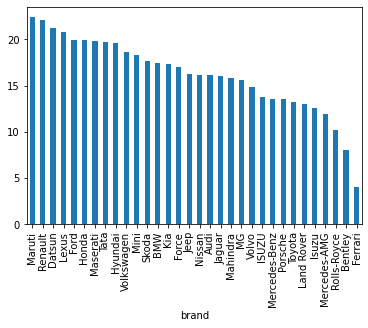

In [37]:
df.groupby(['brand'])['mileage'].mean().sort_values(ascending = False).plot(kind = 'bar')

## Maruti has the best mileage of all brands = 22.45 kms/lit
## Renault and Datsun stood next = 22, 21.21 kms/lit

In [38]:
df.sort_values(by=['mileage'], ascending = False).head(30)

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
11310,Maruti Wagon R,Maruti,Wagon R,597000.000000,604000.000000,5,65000,Dealer,CNG,Manual,33.54,998,67.04,5,310000
2750,Maruti Wagon R,Maruti,Wagon R,621000.000000,629000.000000,8,55853,Dealer,CNG,Manual,33.54,998,67.04,5,349000
2925,Maruti Wagon R,Maruti,Wagon R,609000.000000,617000.000000,3,32000,Dealer,CNG,Manual,33.54,998,67.04,5,485000
9193,Maruti Wagon R,Maruti,Wagon R,599000.000000,606000.000000,2,19022,Dealer,CNG,Manual,33.54,998,67.04,5,470000
1250,Maruti Wagon R,Maruti,Wagon R,597000.000000,604000.000000,4,32013,Trustmark Dealer,CNG,Manual,33.54,998,67.04,5,380000
2364,Maruti Wagon R,Maruti,Wagon R,609000.000000,617000.000000,8,63000,Dealer,CNG,Manual,33.54,998,67.04,5,351000
9908,Maruti Wagon R,Maruti,Wagon R,597000.000000,604000.000000,5,37208,Trustmark Dealer,CNG,Manual,33.54,998,67.04,5,365000
3743,Maruti Wagon R,Maruti,Wagon R,609000.000000,617000.000000,7,69000,Dealer,CNG,Manual,33.54,998,67.04,5,349000
9960,Maruti Wagon R,Maruti,Wagon R,545348.134991,691769.094139,3,55000,Dealer,CNG,Manual,33.54,998,67.04,5,380000
12260,Maruti Wagon R,Maruti,Wagon R,597000.000000,604000.000000,5,56000,Dealer,CNG,Manual,33.54,998,67.04,5,360000


In [39]:
df[df['car_name'] == 'Hyundai i20']

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
2,Hyundai i20,Hyundai,i20,854082.865169,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
28,Hyundai i20,Hyundai,i20,854082.865169,1.307926e+06,3,25000,Individual,Petrol,Manual,17.19,1197,81.86,5,700000
35,Hyundai i20,Hyundai,i20,854082.865169,1.307926e+06,3,15000,Individual,Diesel,Manual,22.54,1396,88.73,5,850000
36,Hyundai i20,Hyundai,i20,763000.000000,1.266000e+06,3,40000,Individual,Petrol,Manual,18.60,1197,81.83,5,598000
49,Hyundai i20,Hyundai,i20,959000.000000,1.283000e+06,5,70000,Individual,Diesel,Manual,22.54,1396,88.73,5,750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15269,Hyundai i20,Hyundai,i20,756000.000000,1.255000e+06,4,25000,Individual,Petrol,Manual,18.60,1197,81.83,5,650000
15289,Hyundai i20,Hyundai,i20,822000.000000,1.402000e+06,11,99250,Individual,Petrol,Manual,17.00,1197,80.00,5,325000
15293,Hyundai i20,Hyundai,i20,803000.000000,1.341000e+06,6,50000,Dealer,Petrol,Automatic,15.00,1396,98.60,5,400000
15377,Hyundai i20,Hyundai,i20,819000.000000,1.393000e+06,8,120000,Individual,Petrol,Manual,18.50,1197,82.85,5,300000


In [40]:
df[df['car_name'] == 'Hyundai i20']['fuel_type'].value_counts()

Petrol    570
Diesel    336
Name: fuel_type, dtype: int64

In [41]:
df[df['car_name'] == 'Hyundai i20'].groupby(['fuel_type'])['mileage'].mean()

fuel_type
Diesel    22.275774
Petrol    18.202789
Name: mileage, dtype: float64

In [42]:
df[df['car_name'] == 'Hyundai i20']['mileage'].mean()

19.713300220750693

In [43]:
df[df['car_name'] == 'Hyundai i20']['mileage'].max()

25.2

In [44]:
df[df['car_name'] == 'Hyundai i20']['vehicle_age'].mean()

5.83112582781457

In [45]:
df[df['car_name'] == 'Hyundai i20'].groupby(['fuel_type'])['vehicle_age'].mean()

fuel_type
Diesel    6.113095
Petrol    5.664912
Name: vehicle_age, dtype: float64

In [46]:
df[df['car_name'] == 'Hyundai i20'].groupby(['fuel_type'])['km_driven'].mean()

fuel_type
Diesel    65848.309524
Petrol    41624.445614
Name: km_driven, dtype: float64

In [47]:
df[df['car_name'] == 'Maruti Wagon R']['vehicle_age'].mean()

7.693165969316597

In [48]:
df[df['car_name'] == 'Maruti Wagon R']['fuel_type'].value_counts()

Petrol    563
CNG       123
LPG        31
Name: fuel_type, dtype: int64

In [49]:
df[df['car_name'] == 'Maruti Wagon R'].groupby(['fuel_type'])['vehicle_age'].mean()

fuel_type
CNG        6.000000
LPG       11.709677
Petrol     7.841918
Name: vehicle_age, dtype: float64

In [50]:
df[df['car_name'] == 'Maruti Wagon R'].groupby(['fuel_type'])['mileage'].mean()

fuel_type
CNG       28.479024
LPG       18.487097
Petrol    19.929343
Name: mileage, dtype: float64

In [51]:
df[df['car_name'] == 'Maruti Alto']['vehicle_age'].mean()

7.4575835475578405

In [52]:
df[df['car_name'] == 'Maruti Alto']['fuel_type'].value_counts()

Petrol    741
CNG        37
Name: fuel_type, dtype: int64

In [53]:
df[df['car_name'] == 'Maruti Alto'].groupby(['fuel_type'])['vehicle_age'].mean()

fuel_type
CNG       6.054054
Petrol    7.527665
Name: vehicle_age, dtype: float64

In [54]:
df[df['car_name'] == 'Maruti Alto'].groupby(['fuel_type'])['mileage'].mean()

fuel_type
CNG       31.291622
Petrol    22.258947
Name: mileage, dtype: float64

<BarContainer object of 3 artists>

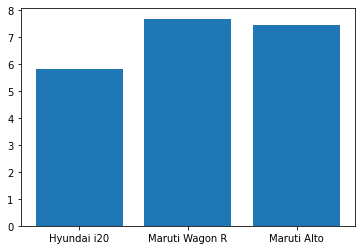

In [55]:
plt.bar(['Hyundai i20', 'Maruti Wagon R', 'Maruti Alto'], [df[df['car_name'] == 'Hyundai i20']['vehicle_age'].mean(), df[df['car_name'] == 'Maruti Wagon R']['vehicle_age'].mean(), df[df['car_name'] == 'Maruti Alto']['vehicle_age'].mean()])

<AxesSubplot:>

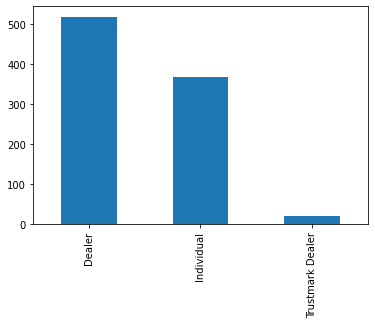

In [56]:
df[df['car_name'] == 'Hyundai i20']['seller_type'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

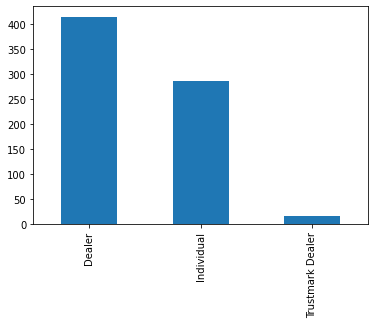

In [57]:
df[df['car_name'] == 'Maruti Wagon R']['seller_type'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

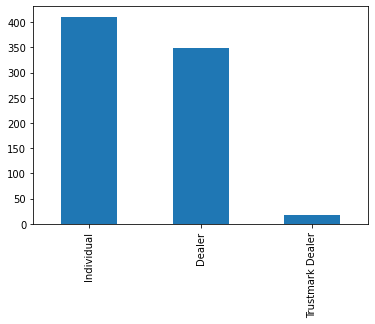

In [58]:
df[df['car_name'] == 'Maruti Alto']['seller_type'].value_counts().plot(kind = 'bar')

## Maruti WagonR and Alto are giving the best mileage = 33.54 kms/lit as they are in top 6 sold cars

## Top selling Hyundai i20 gives mileage around 20 kms/lit with maximum at 25 kms/lit

## Inspite of less mileage i20 is top selling maybe due to less average vehicle age = 5.83 compared to WagonR = 7.83 and Alto = 7.43

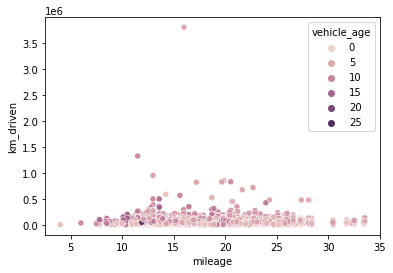

In [59]:
sns.scatterplot(data = df, x = df.mileage, y = df.km_driven, hue = df.vehicle_age)
plt.show()

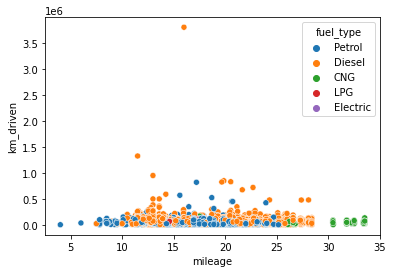

In [60]:
sns.scatterplot(data = df, x = df.mileage, y = df.km_driven, hue = df.fuel_type)
plt.show()

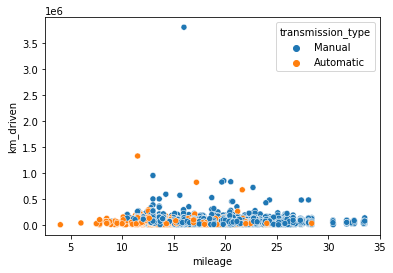

In [61]:
sns.scatterplot(data = df, x = df.mileage, y = df.km_driven, hue = df.transmission_type)
plt.show()

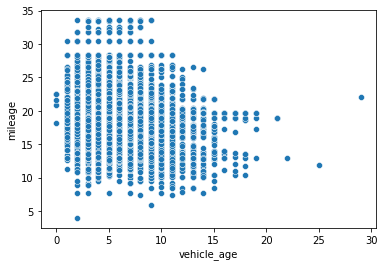

In [62]:
sns.scatterplot(data = df, x = df.vehicle_age, y = df.mileage)
plt.show()

## Mileage decreases as vehicle age increases. This is quite natural as years go the parts get weared out and its efficiency will decrease gradually

In [63]:
from scipy.stats import f_oneway
def oneway_posthoc(i):
    cat = {}
    for j in range(df[i].nunique()):
        if pd.isna(df[i].unique()[j]) == False:
            cat[df[i].unique()[j]] = df[df[i] == df[i].unique()[j]]['min_cost_price']
    tstat,pval = f_oneway(*list(cat.values()))
    print(f'pvalue for {i} is {pval}')
    print()
    for k in cat:
        print(f'Avg price of car for {i} = {k} is ',cat[k].mean())

In [64]:
oneway_posthoc('vehicle_age')

pvalue for vehicle_age is 0.030532735809235538

Avg price of car for vehicle_age = 9 is  9728031.475259546
Avg price of car for vehicle_age = 5 is  6067491.472072573
Avg price of car for vehicle_age = 11 is  13796394.40938651
Avg price of car for vehicle_age = 6 is  4748646.380990652
Avg price of car for vehicle_age = 8 is  4933488.887123948
Avg price of car for vehicle_age = 3 is  3652399.5516713434
Avg price of car for vehicle_age = 2 is  4724555.974713435
Avg price of car for vehicle_age = 4 is  3698022.1435856638
Avg price of car for vehicle_age = 7 is  5080674.916401938
Avg price of car for vehicle_age = 10 is  9632215.598617617
Avg price of car for vehicle_age = 14 is  7670632.010437371
Avg price of car for vehicle_age = 12 is  7811560.395378578
Avg price of car for vehicle_age = 1 is  9634905.477151677
Avg price of car for vehicle_age = 15 is  17626670.141510505
Avg price of car for vehicle_age = 13 is  9402305.208519557
Avg price of car for vehicle_age = 16 is  28450694.6042679

<AxesSubplot:xlabel='vehicle_age'>

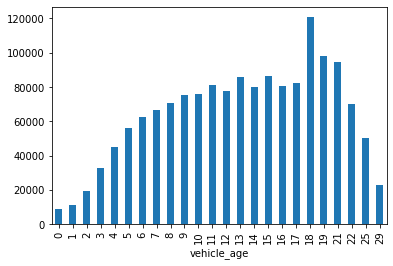

In [65]:
df.groupby(['vehicle_age'])['km_driven'].mean().plot(kind = 'bar')

In [66]:
df[df['vehicle_age'] > 18]

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
2596,Maruti Alto,Maruti,Alto,3.550000e+05,4.720000e+05,29,22612,Dealer,Petrol,Manual,22.05,796,47.3,5,60000
3787,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,19,120000,Individual,Petrol,Manual,18.90,1061,47.0,5,50000
6539,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,19,82000,Individual,Petrol,Manual,19.70,796,46.3,5,100000
6660,Maruti Wagon R,Maruti,Wagon R,5.360000e+05,7.140000e+05,21,83000,Individual,Petrol,Manual,18.90,998,67.1,5,85000
7361,Honda City,Honda,City,1.269000e+06,1.686000e+06,19,110000,Individual,Petrol,Manual,13.00,1493,100.0,5,50000
7607,Maruti Wagon R,Maruti,Wagon R,5.170000e+05,6.890000e+05,21,80000,Individual,Petrol,Manual,18.90,998,67.1,5,40000
7687,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,19,54000,Dealer,Petrol,Manual,19.70,796,46.3,5,90000
8000,Maruti Wagon R,Maruti,Wagon R,5.453481e+05,6.917691e+05,19,123500,Individual,Petrol,Manual,17.30,1061,64.0,5,80000
8146,Maruti Wagon R,Maruti,Wagon R,5.260000e+05,7.010000e+05,21,120000,Individual,Petrol,Manual,18.90,998,67.1,5,95000
14317,Honda City,Honda,City,1.258000e+06,1.671000e+06,22,70000,Individual,Petrol,Manual,13.00,1493,100.0,5,70000


<AxesSubplot:xlabel='brand'>

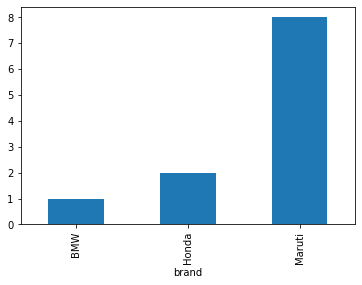

In [67]:
df[df['vehicle_age'] > 18].groupby(['brand'])['model'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='brand,fuel_type'>

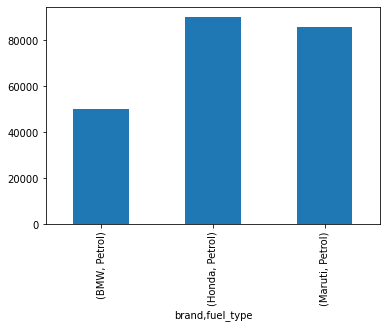

In [68]:
df[df['vehicle_age'] > 18].groupby(['brand', 'fuel_type'])['km_driven'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='seller_type'>

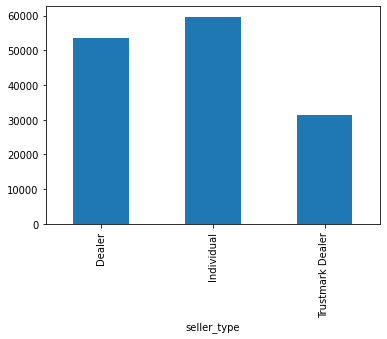

In [69]:
df.groupby(['seller_type'])['km_driven'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='vehicle_age'>

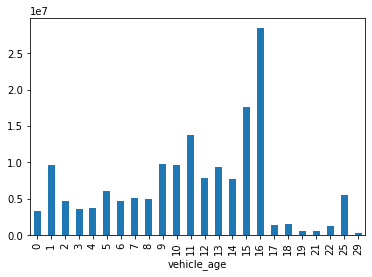

In [70]:
df.groupby(['vehicle_age'])['min_cost_price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='vehicle_age'>

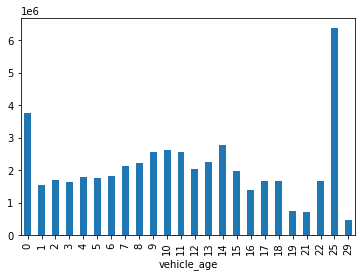

In [71]:
df.groupby(['vehicle_age'])['max_cost_price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='brand'>

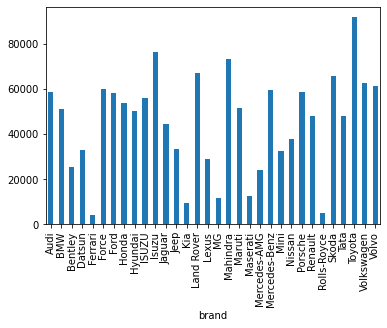

In [72]:
df.groupby(['brand'])['km_driven'].mean().plot(kind = 'bar')

In [73]:
df.fuel_type.value_counts()

Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: fuel_type, dtype: int64

<AxesSubplot:>

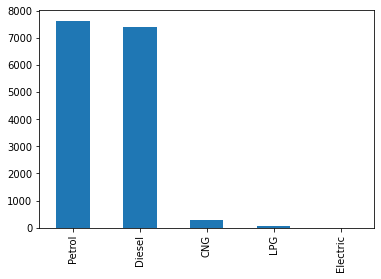

In [74]:
df.fuel_type.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='fuel_type'>

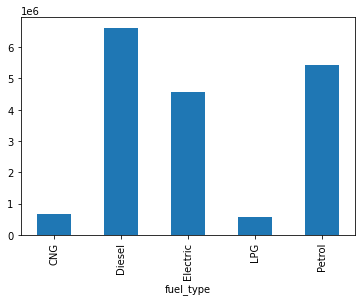

In [75]:
df.groupby(['fuel_type'])['min_cost_price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='fuel_type'>

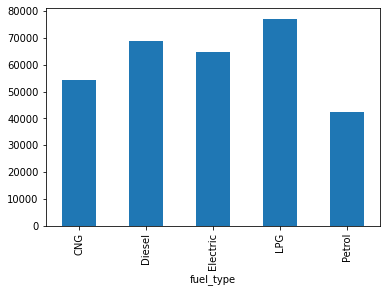

In [76]:
df.groupby(['fuel_type'])['km_driven'].mean().plot(kind = 'bar')

fuel_type
CNG          5.514950
Diesel       6.078852
Electric     5.750000
LPG         11.090909
Petrol       5.986654
Name: vehicle_age, dtype: float64


<AxesSubplot:xlabel='fuel_type'>

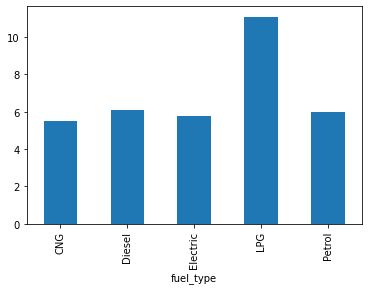

In [77]:
print(df.groupby(['fuel_type'])['vehicle_age'].mean())
df.groupby(['fuel_type'])['vehicle_age'].mean().plot(kind = 'bar')

In [78]:
df[df['fuel_type'] == 'Electric']

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
1997,Toyota Camry,Toyota,Camry,4557120.0,4557120.0,6,49500,Dealer,Electric,Automatic,19.16,2494,157.7,5,1850000
11630,Toyota Camry,Toyota,Camry,4557120.0,4557120.0,6,60000,Individual,Electric,Automatic,19.16,2494,157.7,5,2000000
14323,Toyota Camry,Toyota,Camry,4557120.0,4557120.0,5,85000,Dealer,Electric,Automatic,19.16,2494,157.7,5,1865000
14600,Toyota Camry,Toyota,Camry,4557120.0,4557120.0,6,64000,Dealer,Electric,Automatic,19.16,2494,157.7,5,1699000


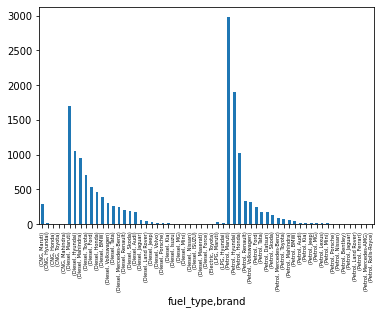

In [79]:
df.groupby(['fuel_type'])['brand'].value_counts().plot(kind = 'bar')
plt.xticks(size = 5)
plt.show()

<AxesSubplot:xlabel='fuel_type'>

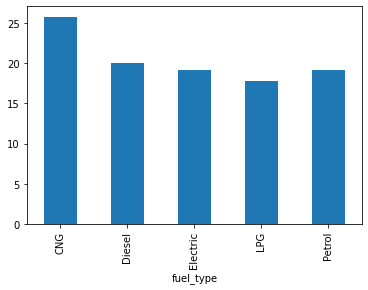

In [80]:
df.groupby(['fuel_type'])['mileage'].mean().plot(kind = 'bar')

## CNG vehicles are giving best average mileage followed by Diesel and Petrol
## That's why Maruti WagonR and Alto which are CNG are giving at top in best mileage list and top selling cars list

In [81]:
df['transmission_type'].value_counts()

Manual       12225
Automatic     3186
Name: transmission_type, dtype: int64

<AxesSubplot:xlabel='transmission_type'>

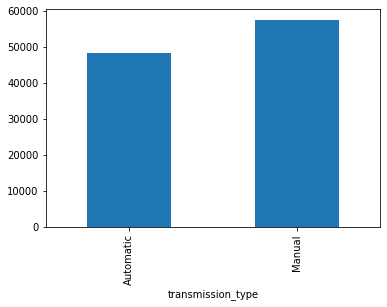

In [82]:
df.groupby(['transmission_type'])['km_driven'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='transmission_type'>

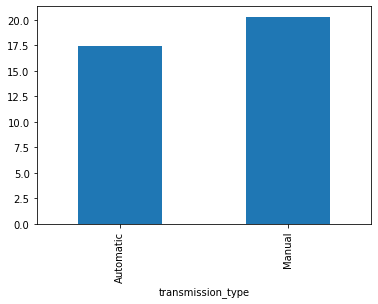

In [83]:
df.groupby(['transmission_type'])['mileage'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='transmission_type'>

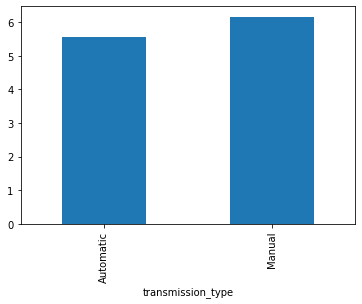

In [84]:
df.groupby(['transmission_type'])['vehicle_age'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='transmission_type'>

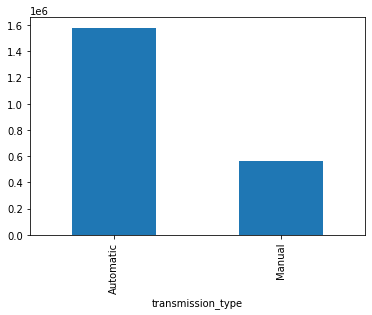

In [85]:
df.groupby(['transmission_type'])['selling_price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='transmission_type,fuel_type'>

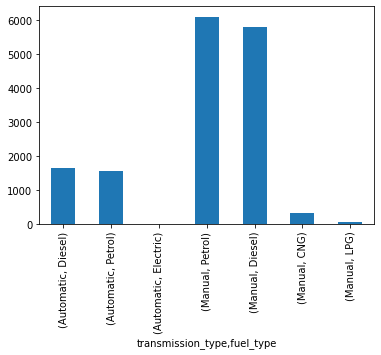

In [86]:
df.groupby(['transmission_type'])['fuel_type'].value_counts().plot(kind = 'bar')

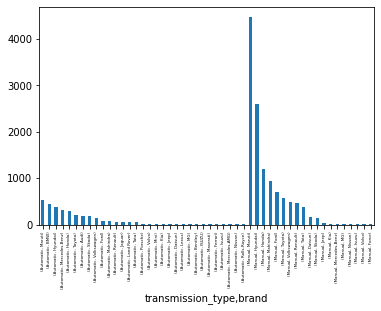

In [87]:
df.groupby(['transmission_type'])['brand'].value_counts().plot(kind = 'bar')
plt.xticks(size=4)
plt.show()

<AxesSubplot:xlabel='brand'>

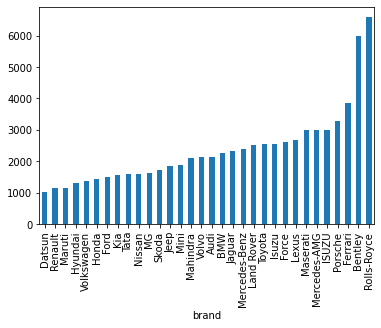

In [88]:
df.groupby(['brand'])['engine'].mean().sort_values(ascending = True).plot(kind = 'bar')

<AxesSubplot:xlabel='brand'>

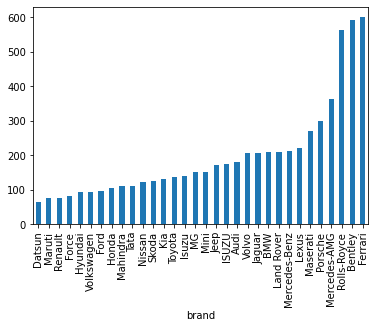

In [89]:
df.groupby(['brand'])['max_power'].mean().sort_values(ascending = True).plot(kind = 'bar')

<AxesSubplot:xlabel='engine', ylabel='max_power'>

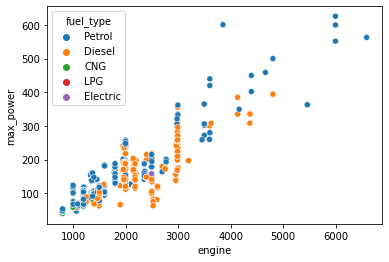

In [90]:
sns.scatterplot(data = df, x = df.engine, y=df.max_power, hue = df.fuel_type)

### From the above graph, we can observe that Petrol cars have more engine cc which translated to max power
### Electric stands at middle, while CNG & LPG at lower end of the graph

<AxesSubplot:xlabel='engine', ylabel='max_power'>

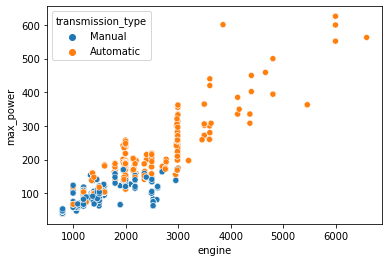

In [91]:
sns.scatterplot(data = df, x = df.engine, y=df.max_power, hue = df.transmission_type)

### Automatic transmission vehicles have more engine CC and can produce max power levels than Manual transmission type

<AxesSubplot:xlabel='engine', ylabel='max_power'>

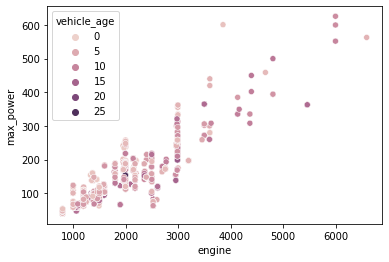

In [92]:
sns.scatterplot(data = df, x = df.engine, y=df.max_power, hue = df.vehicle_age)

<AxesSubplot:xlabel='engine', ylabel='mileage'>

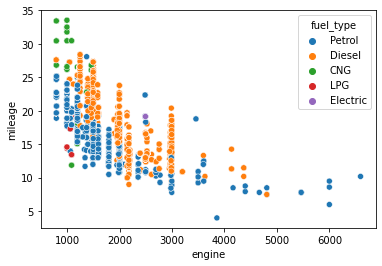

In [93]:
sns.scatterplot(data = df, x = df.engine, y=df.mileage, hue = df.fuel_type)

### Mileage drops as engine cc increases, from this we can infer that CNG which have less engine cc provides best mileage among all vehicles followed by Diesel and Petrol. Electric stands in the middle

<AxesSubplot:xlabel='engine', ylabel='mileage'>

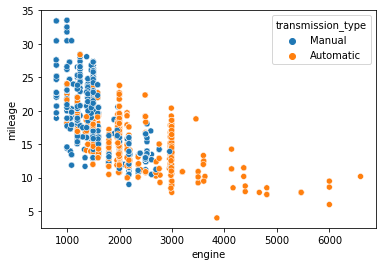

In [94]:
sns.scatterplot(data = df, x = df.engine, y=df.mileage, hue = df.transmission_type)

### Automatic transmission provides less mileage than its counterpart Manual transmission

<AxesSubplot:xlabel='engine', ylabel='mileage'>

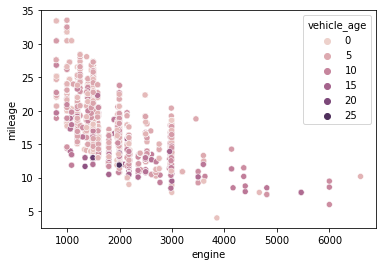

In [95]:
sns.scatterplot(data = df, x = df.engine, y=df.mileage, hue = df.vehicle_age)

### We can observe that as vehicle age increases its mileage decreases

<AxesSubplot:xlabel='max_power', ylabel='mileage'>

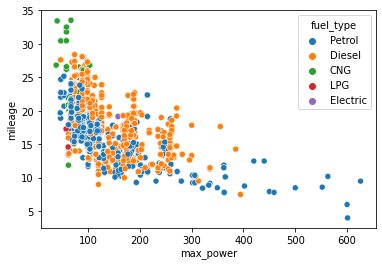

In [96]:
sns.scatterplot(data = df, x = df.max_power, y=df.mileage, hue = df.fuel_type)

<AxesSubplot:xlabel='max_power', ylabel='mileage'>

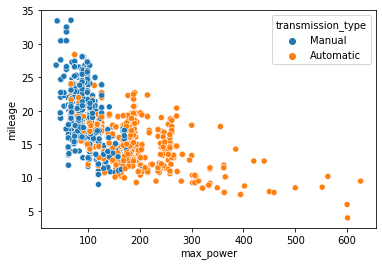

In [97]:
sns.scatterplot(data = df, x = df.max_power, y=df.mileage, hue = df.transmission_type)

<AxesSubplot:xlabel='max_power', ylabel='mileage'>

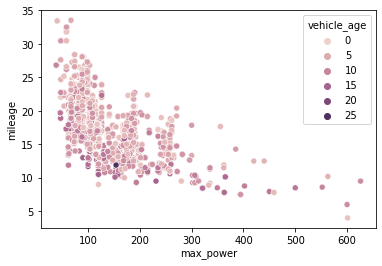

In [98]:
sns.scatterplot(data = df, x = df.max_power, y=df.mileage, hue = df.vehicle_age)

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

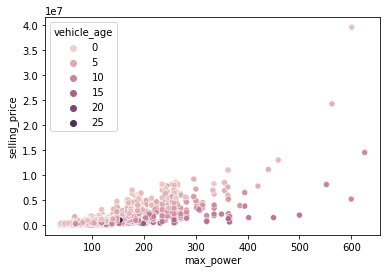

In [99]:
sns.scatterplot(data = df, x = df.max_power, y=df.selling_price, hue = df.vehicle_age)

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

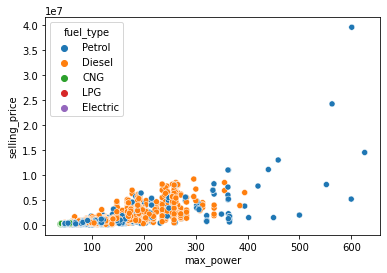

In [100]:
sns.scatterplot(data = df, x = df.max_power, y=df.selling_price, hue = df.fuel_type)

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

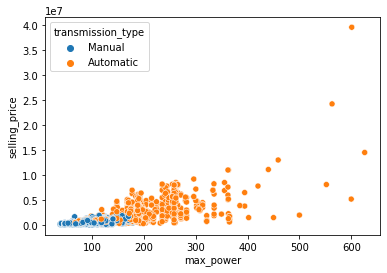

In [101]:
sns.scatterplot(data = df, x = df.max_power, y=df.selling_price, hue = df.transmission_type)

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

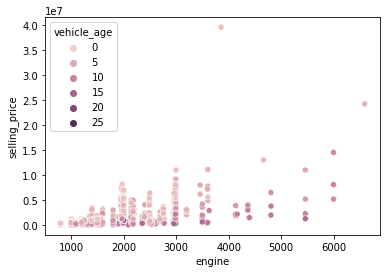

In [102]:
sns.scatterplot(data = df, x = df.engine, y=df.selling_price, hue = df.vehicle_age)

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

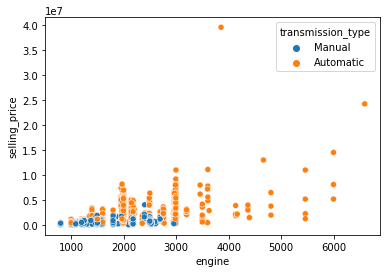

In [103]:
sns.scatterplot(data = df, x = df.engine, y=df.selling_price, hue = df.transmission_type)

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

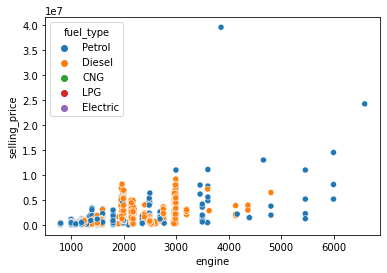

In [104]:
sns.scatterplot(data = df, x = df.engine, y=df.selling_price, hue = df.fuel_type)

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

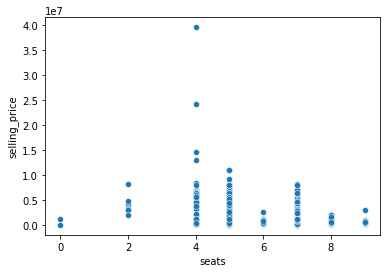

In [105]:
sns.scatterplot(data = df, x = df.seats, y=df.selling_price)

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

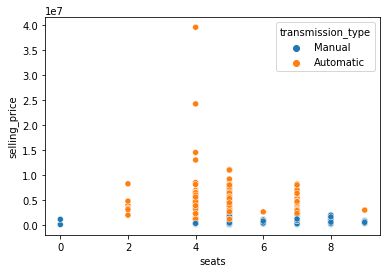

In [106]:
sns.scatterplot(data = df, x = df.seats, y=df.selling_price, hue = df.transmission_type)

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

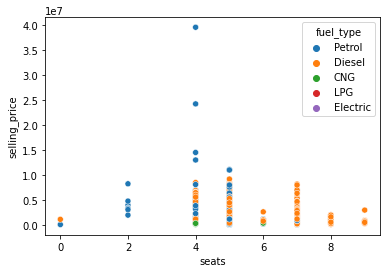

In [107]:
sns.scatterplot(data = df, x = df.seats, y=df.selling_price, hue = df.fuel_type)

<AxesSubplot:xlabel='seats', ylabel='km_driven'>

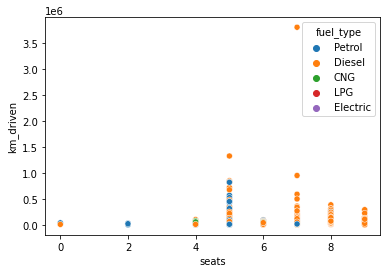

In [108]:
sns.scatterplot(data = df, x = df.seats, y=df.km_driven, hue = df.fuel_type)

<AxesSubplot:xlabel='seats', ylabel='mileage'>

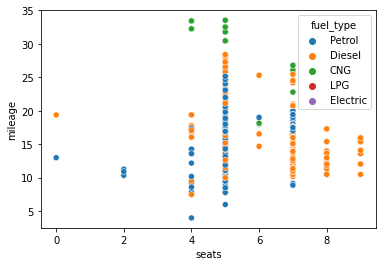

In [109]:
sns.scatterplot(data = df, x = df.seats, y=df.mileage, hue = df.fuel_type)

<AxesSubplot:xlabel='seats', ylabel='engine'>

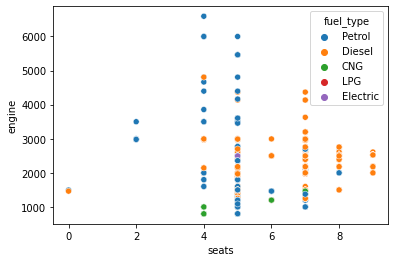

In [110]:
sns.scatterplot(data = df, x = df.seats, y=df.engine, hue = df.fuel_type)

<AxesSubplot:xlabel='seats', ylabel='max_power'>

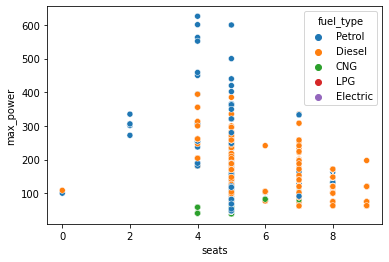

In [111]:
sns.scatterplot(data = df, x = df.seats, y=df.max_power, hue = df.fuel_type)

<AxesSubplot:>

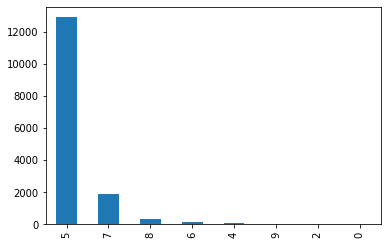

In [112]:
df.seats.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='seats'>

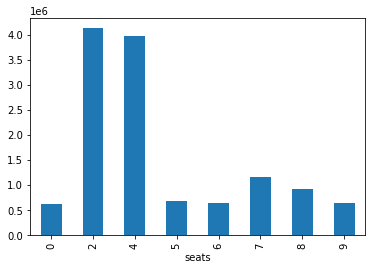

In [113]:
df.groupby(['seats'])['selling_price'].mean().plot(kind = 'bar')

In [114]:
df1 = df.copy()

In [115]:
df1.transmission_type = df1.transmission_type.map({'Manual': 0, 'Automatic': 1})

In [116]:
df1

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,0,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,0,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,0,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,0,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,0,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,6.983200e+05,7.293333e+05,9,10723,Dealer,Petrol,0,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,9.267760e+05,1.149968e+06,2,18000,Dealer,Petrol,0,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,8.926327e+05,1.563551e+06,6,67000,Dealer,Diesel,0,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,1.783000e+06,2.491000e+06,5,3800000,Dealer,Diesel,0,16.00,2179,140.00,7,1225000


In [117]:
df1.seller_type = df1.seller_type.map({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2})

In [118]:
df1

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,0,Petrol,0,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,0,Petrol,0,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,0,Petrol,0,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,0,Petrol,0,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,1,Diesel,0,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,6.983200e+05,7.293333e+05,9,10723,1,Petrol,0,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,9.267760e+05,1.149968e+06,2,18000,1,Petrol,0,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,8.926327e+05,1.563551e+06,6,67000,1,Diesel,0,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,1.783000e+06,2.491000e+06,5,3800000,1,Diesel,0,16.00,2179,140.00,7,1225000


In [119]:
df.brand.nunique()

32

In [120]:
df.model.nunique()

120

In [121]:
company_name = df1.brand.value_counts().index[:15]
for i in range(df1.shape[0]):
    if df1['brand'][i] in company_name:
         continue
    else:
        df1['brand'][i] = 'others'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
df1 = pd.get_dummies(data=df1, columns=['seller_type','fuel_type','transmission_type','brand'], drop_first=True)
df1.shape

(15411, 33)

In [123]:
df1

,car_name,model,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,...,brand_Jaguar,brand_Mahindra,brand_Maruti,brand_Mercedes-Benz,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_others
0,Maruti Alto,Alto,3.570039e+05,4.654015e+05,9,120000,19.70,796,46.30,5,...,0,0,1,0,0,0,0,0,0,0
1,Hyundai Grand,Grand,7.110000e+05,7.480000e+05,5,20000,18.90,1197,82.00,5,...,0,0,0,0,0,0,0,0,0,0
2,Hyundai i20,i20,8.540829e+05,1.307926e+06,11,60000,17.00,1197,80.00,5,...,0,0,0,0,0,0,0,0,0,0
3,Maruti Alto,Alto,3.570039e+05,4.654015e+05,9,37000,20.92,998,67.10,5,...,0,0,1,0,0,0,0,0,0,0
4,Ford Ecosport,Ecosport,1.014000e+06,1.379000e+06,6,30000,22.77,1498,98.59,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,i10,6.983200e+05,7.293333e+05,9,10723,19.81,1086,68.05,5,...,0,0,0,0,0,0,0,0,0,0
15407,Maruti Ertiga,Ertiga,9.267760e+05,1.149968e+06,2,18000,17.50,1373,91.10,7,...,0,0,1,0,0,0,0,0,0,0
15408,Skoda Rapid,Rapid,8.926327e+05,1.563551e+06,6,67000,21.14,1498,103.52,5,...,0,0,0,0,0,1,0,0,0,0
15409,Mahindra XUV500,XUV500,1.783000e+06,2.491000e+06,5,3800000,16.00,2179,140.00,7,...,0,1,0,0,0,0,0,0,0,0


In [124]:
df1.corr()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_1,...,brand_Jaguar,brand_Mahindra,brand_Maruti,brand_Mercedes-Benz,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_others
min_cost_price,1.000000,0.341046,0.033534,-0.001838,-0.134053,0.158533,0.245970,-0.001314,0.225362,0.050940,...,0.000943,-0.021248,-0.064177,0.273570,-0.017401,-0.009515,-0.014651,-0.013757,-0.018246,0.103686
max_cost_price,0.341046,1.000000,0.091545,0.042115,-0.402738,0.651891,0.813462,0.056068,0.719937,0.147284,...,0.103135,-0.018164,-0.258257,0.493869,-0.058729,0.038922,-0.034078,0.111548,-0.044384,0.308430
vehicle_age,0.033534,0.091545,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851,0.045779,...,0.006924,-0.001543,-0.022337,0.078740,-0.075513,0.039467,-0.098543,0.038326,0.043450,-0.068865
km_driven,-0.001838,0.042115,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030,-0.048814,...,-0.013688,0.090173,-0.056841,0.010734,-0.029092,0.028467,-0.025562,0.163130,0.028088,-0.035270
mileage,-0.134053,-0.402738,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549,-0.079906,...,-0.053673,-0.243132,0.453008,-0.221008,0.109131,-0.072585,0.002199,-0.362233,-0.049643,-0.132094
engine,0.158533,0.651891,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844,0.114754,...,0.097964,0.317472,-0.457153,0.262952,-0.128936,0.065344,0.030101,0.478765,-0.044156,0.180961
max_power,0.245970,0.813462,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236,0.185213,...,0.151607,0.051902,-0.420094,0.383856,-0.113472,0.088067,0.036846,0.191376,-0.038288,0.272557
seats,-0.001314,0.056068,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033,-0.049431,...,-0.024985,0.548748,-0.154147,-0.028396,-0.065979,-0.059985,0.068322,0.517117,-0.083332,-0.014533
selling_price,0.225362,0.719937,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000,0.139037,...,0.129524,0.003700,-0.222871,0.285257,-0.070908,0.001518,-0.017326,0.155348,-0.059176,0.337457
seller_type_1,0.050940,0.147284,0.045779,-0.048814,-0.079906,0.114754,0.185213,-0.049431,0.139037,1.000000,...,0.031330,-0.098103,-0.086488,0.090817,-0.039212,0.066309,-0.094240,0.052105,0.072918,0.047199


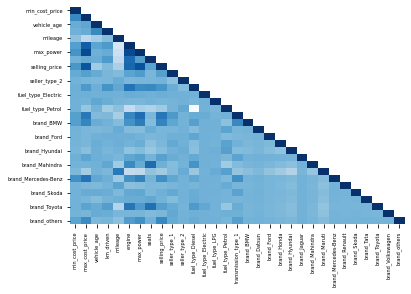

In [125]:
fig = plt.figure(figsize=(6,4))
ax = sns.heatmap(df1.corr(), cmap='Blues', mask=np.triu(df1.corr(), k=1), cbar=False,
                 annot_kws=dict(fontsize=4))
ax.set_facecolor('white')
ax.tick_params(labelsize=5)
plt.show()

In [126]:
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### One way anova
ANOVA is a statistical process for analysing the amount of variance that is contributed to a sample by different factors. An analysis of variance or ANOVA allows the comparison of several means of several groups. An ANOVA is often used when you deal with more than 2 groups. It uses F statistic to evaluate the variability between groups relative to the variability within groups.

Example
We are interested in the km driven in different fuel type

Null Hypothesis
Ho: the average km driven is the same among different groups

In [127]:
fu_ty = df.groupby(['fuel_type'])['km_driven'].describe()
fu_ty

,count,mean,std,min,25%,50%,75%,max
fuel_type,,,,,,,,
CNG,301.0,54411.770764,25564.493308,5000.0,37000.00,53000.0,66807.0,170000.0
Diesel,7419.0,68999.548457,64553.898020,1001.0,42000.00,62000.0,83000.5,3800000.0
Electric,4.0,64625.000000,14896.168411,49500.0,57375.00,62000.0,69250.0,85000.0
LPG,44.0,77157.727273,29009.331878,15000.0,59353.25,72260.5,92500.0,150624.0
Petrol,7643.0,42544.360853,30818.668069,100.0,21000.00,38872.0,58000.0,820000.0


From the summary table, each fuel type have different average km driven. The gives first impression that the our null hypothesis is not right. We will check the significance to validate our assumption.

We also need to check if the group size is equal in each species to determine the formulas of calculating within gorup variances. Here the group size is not equal.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed

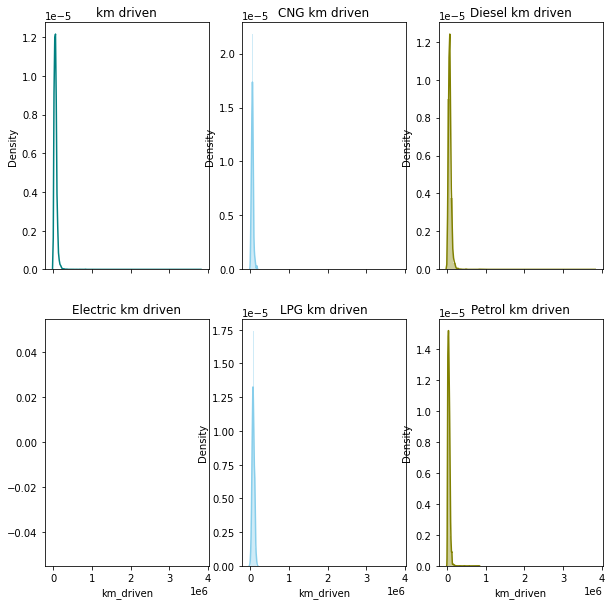

In [128]:
f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True)
sns.distplot(df["km_driven"] , color="teal", bins=np.linspace(4,8,9), ax=axes[0, 0])
axes[0, 0].set(title='km driven')
sns.distplot(df["km_driven"][df.fuel_type=='CNG'] , color="skyblue", ax=axes[0, 1])
axes[0, 1].set(title='CNG km driven')
sns.distplot(df["km_driven"][df.fuel_type=='Diesel'] , color="olive", ax=axes[0, 2])
axes[0, 2].set(title='Diesel km driven')
sns.distplot(df["km_driven"][df.fuel_type=='ELectric'] , color="gold", ax=axes[1, 0])
axes[1, 0].set(title='Electric km driven')
sns.distplot(df["km_driven"][df.fuel_type=='LPG'] , color="skyblue", ax=axes[1, 1])
axes[1, 1].set(title='LPG km driven')
sns.distplot(df["km_driven"][df.fuel_type=='Petrol'] , color="olive", ax=axes[1, 2])
axes[1, 2].set(title='Petrol km driven')
plt.show()

In [129]:
g = 5 #number of group
n = 7000 #number of size of individual group
grandmean = df.km_driven.mean()

mswithin = sum(fu_ty['std']**2)/g
msbetween = sum(n*(fu_ty['mean']-grandmean)**2)/(g-1)
Fstat=msbetween/mswithin
pval = 1-st.f.cdf(Fstat, (g-1), (n*g-g))

print(f'The F statistics is {Fstat:.4f} and P value is {pval:.4f}')

The F statistics is 1147.9989 and P value is 0.0000


Here our p value is close to 0. The chances that we will obtain this data under null hypothesis is extremely low. This means that there is a difference in km driven for the different fuel types. However, we don't know yet which fuel type
differ significantly.

In [130]:
fu_ty_ols=smf.ols('km_driven ~ C(fuel_type)', data=df).fit() #Specify C for Categorical
test_result = sm.stats.anova_lm(fu_ty_ols, typ=2)
test_result

,sum_sq,df,F,PR(>F)
C(fuel_type),2.656008e+12,4.0,266.371629,9.569194e-222
Residual,3.840354e+13,15406.0,NaN,NaN


In [131]:
print(fu_ty_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              km_driven   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     266.4
Date:                Sun, 23 Jan 2022   Prob (F-statistic):          9.57e-222
Time:                        15:34:49   Log-Likelihood:            -1.8859e+05
No. Observations:               15411   AIC:                         3.772e+05
Df Residuals:                   15406   BIC:                         3.772e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### Assumptions checking anova
1. The population distribution for the dependent variable for each of the g groups need to be approximately normal. We can use Shapiro Walk Test in python shapiro function.
2. Those distributions for each of the groups have the same standard deviation (homogeneity of variances). We can use Barlett's Test in python barlett function.
3. No correlation between the residual (error) terms. (aka. no autocorrelation)
4. The data resulted from randomization

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 360x288 with 0 Axes>

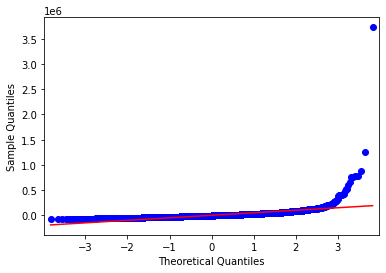

In [132]:
res = fu_ty_ols.resid 
fig =plt.figure(figsize=(5,4))
ax = sm.qqplot(res, line='s')
plt.show()

In [133]:
#normality test
stat, p = st.shapiro(df['km_driven'])
print('Normality Test: Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)\n')
 
#homogeneity
cng = df["km_driven"][df.fuel_type=='CNG']
diesel = df["km_driven"][df.fuel_type=='Diesel']
electric = df["km_driven"][df.fuel_type=='Electric']
petrol = df["km_driven"][df.fuel_type=='Petrol']
lpg = df["km_driven"][df.fuel_type=='LPG']
stat, p = st.bartlett(cng, diesel, electric, petrol, lpg)
print('Homogeneity Test: Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample has the same variances (fail to reject H0)')
else:
	print('Sample does not have the same variances (reject H0)')

Normality Test: Statistics=0.502, p=0.000
Sample does not look Gaussian (reject H0)

Homogeneity Test: Statistics=3900.572, p=0.000
Sample does not have the same variances (reject H0)


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


From the plots, there is an outlier that deviate from the straight line. Other than that, the residuals are clustered along with the straight line. The shapiro normality test concludes p=0.1, which does not meet assumption at 0.05 significance level. Homogeneity of variance are not met either. We can clean up the data and rerun the test again. Otherwise, we should use non parametric test instead of anova test

Another way to check the assumption is to read the summary statistics directly from the ols summary table. The Durban-Watson tests is to detect the presence of autocorrelation, Jarque-Bera tests the assumption of normality, Omnibus tests the assumption of homogeneity of variance, and the Condition Number assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity. The model does not pass the assumption check of homogeneity, normality as tested before

#### Post hoc analysis
There are multiple way to do the post hoc analysis. One of it is the bonferroni correction post hoc comparison where the family-wise error rate is less than or equal to the initial overall significance rate. But this method could be overly conservative. Another one is TukeyHSD post hoc test, where the family-wise error rate is similar to the overal significance rate. This test generally has a narrower confidence interval.

In [134]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['km_driven'], df['fuel_type'])
mc_results = mc.tukeyhsd()
print(mc_results)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1   group2    meandiff  p-adj     lower       upper    reject
-------------------------------------------------------------------
     CNG   Diesel  14587.7777  0.001   6579.3023   22596.253   True
     CNG Electric  10213.2292    0.9  -58340.929  78767.3875  False
     CNG      LPG  22745.9565 0.0384    762.4438  44729.4692   True
     CNG   Petrol -11867.4099  0.001 -19871.3083  -3863.5115   True
  Diesel Electric  -4374.5485    0.9 -72496.0443  63746.9474  False
  Diesel      LPG   8158.1788  0.792 -12436.4905  28752.8482  False
  Diesel   Petrol -26455.1876  0.001 -28675.0898 -24235.2854   True
Electric      LPG  12532.7273    0.9 -58598.6817  83664.1363  False
Electric   Petrol -22080.6391    0.9 -90201.5971  46040.3188  False
     LPG   Petrol -34613.3664  0.001 -55206.2564 -14020.4764   True
-------------------------------------------------------------------


Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual (characteristic #2). We hope to see a value close to zero which would indicate normalcy. The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something close to 1 here. In this case Omnibus is relatively low and the Prob (Omnibus) is relatively high so the data is somewhat normal, but not altogether ideal. A linear regression approach would probably be better than random guessing but likely not as good as a nonlinear approach.

Skew – a measure of data symmetry. We want to see something close to zero, indicating the residual distribution is normal. Note that this value also drives the Omnibus. This result has a small, and therefore good, skew.

Kurtosis – a measure of "peakiness", or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers.

Durbin-Watson – tests for homoscedasticity (characteristic #3). We hope to have a value between 1 and 2. In this case, the data is close, but within limits.

Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test. In this case we do.

Condition Number – This test measures the sensitivity of a function's output as compared to its input (characteristic #4). When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something below 30. In this case we are well below 30, which we would expect given our model only has two variables and one is a constant.

### Two way anova
A two-way anova is used when you want to compare multiple groups across multiple independent variables. In below example, we cut the km_driven to 1 to 4 categories. We will use this together with fuel_type as independent variables to check its differences in selling_price.

Null Hypothesis

1. Avereage selling price is the same across fuel type categories
2. Average selling price is the same across species
3. km_driven and fuel_type are independent of each other

In [135]:
df2 = df.copy()

In [136]:
df2['selling_price_cat']=pd.qcut(df2['selling_price'], q=4, labels=[1,2,3,4])
df2.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,selling_price_cat
0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,1
1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,2
2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,1
3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,1
4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,3


In [137]:
fu_ty_2_ols=smf.ols('km_driven ~ C(selling_price_cat)*C(fuel_type)', data=df2).fit() #This will also automatically include the main effects for each factor
test_result = sm.stats.anova_lm(fu_ty_2_ols, typ=2)
test_result

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 8
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(selling_price_cat),4.710189e+11,3.0,65.438995,6.438022e-16
C(fuel_type),1.643606e+11,4.0,17.126054,3.719721e-08
C(selling_price_cat):C(fuel_type),6.356928e+10,12.0,2.207931,2.395223e-02
Residual,3.693927e+13,15396.0,NaN,NaN


Assume we use 0.05 significance level, we have p value smaller than significance level for both km driven and fuel type, which means, there is a difference in selling price across km driven group and fuel type group.

The interaction term is significant. This indicates that there is interaction effect between the km driven and their fuel type kind.

If we have observd the interaction term not significant, it should be removed from the model and it needs to be re-ran so we can look at the main effects of each factor independently, as we did before, but changing the formula to response~C(facotor1)+C(factor2)

In [138]:
print(fu_ty_2_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              km_driven   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     122.7
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:34:56   Log-Likelihood:            -1.8829e+05
No. Observations:               15411   AIC:                         3.766e+05
Df Residuals:                   15396   BIC:                         3.767e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

The overall model p value is 0, so the model is significant. The R-squaredis 0.131, showing our model explained 13.1% of the variances in the data. There test of assumptions from the anova table did not pass the multicollinearity test being Cond.No over 1.82e+17. We should do a chi-square test to check the two categorical independent variables association. Here, we will continue to do the post hoc testing to see which level shows different km driven.

### Post hoc testing

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

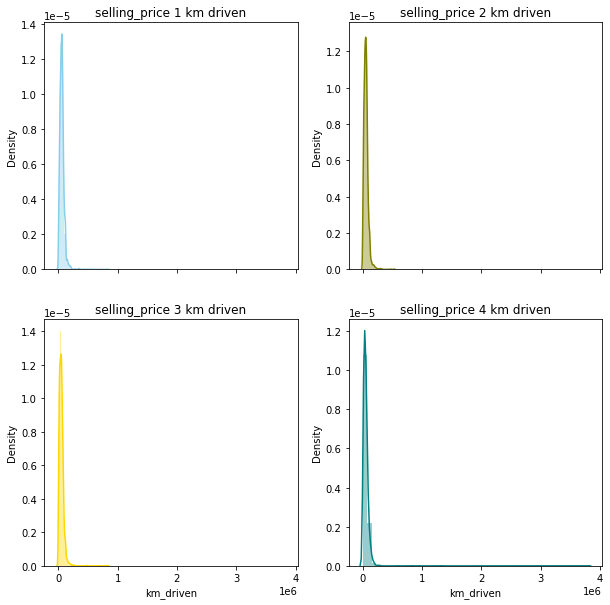

In [139]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.distplot(df2["km_driven"][df2['selling_price_cat']==1] , color="skyblue", ax=axes[0, 0])
axes[0, 0].set(title='selling_price 1 km driven')
sns.distplot(df2["km_driven"][df2['selling_price_cat']==2] , color="olive", ax=axes[0, 1])
axes[0, 1].set(title='selling_price 2 km driven')
sns.distplot(df2["km_driven"][df2['selling_price_cat']==3] , color="gold", ax=axes[1, 0])
axes[1, 0].set(title='selling_price 3 km driven')
sns.distplot(df2["km_driven"][df2['selling_price_cat']==4] , color="teal", ax=axes[1, 1])
axes[1, 1].set(title='selling_price 4 km driven')
plt.show()

In [140]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['selling_price'], df['fuel_type'])
mc_results = mc.tukeyhsd()
print(mc_results)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
 group1   group2     meandiff   p-adj      lower        upper     reject
------------------------------------------------------------------------
     CNG   Diesel   582781.6278  0.001   443758.4457    721804.81   True
     CNG Electric  1435812.2924 0.0089   245745.9173 2625878.6674   True
     CNG      LPG  -211414.9804 0.5476  -593037.9176  170207.9568  False
     CNG   Petrol   155174.2412 0.0196    16230.5128  294117.9696   True
  Diesel Electric   853030.6645  0.282  -329524.9037 2035586.2328  False
  Diesel      LPG  -794196.6082  0.001 -1151709.9103 -436683.3061   True
  Diesel   Petrol  -427607.3866  0.001  -466143.7932 -389070.9801   True
Electric      LPG -1647227.2727 0.0025  -2882033.449 -412421.0964   True
Electric   Petrol -1280638.0512 0.0261 -2463184.2813   -98091.821   True
     LPG   Petrol   366589.2216 0.0412     9106.8085  724071.6346   True
---------------------------------------------------

In [141]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df2['km_driven'], df2['selling_price_cat'])
mc_results = mc.tukeyhsd()
print(mc_results)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------
     1      2   -5638.636  0.001  -8651.2945 -2625.9776   True
     1      3  -9931.3394  0.001 -12911.5386 -6951.1401   True
     1      4 -10148.7917  0.001 -13165.7345  -7131.849   True
     2      3  -4292.7033 0.0014  -7301.6145 -1283.7922   True
     2      4  -4510.1557  0.001  -7555.4639 -1464.8475   True
     3      4   -217.4524    0.9  -3230.6531  2795.7484  False
--------------------------------------------------------------


In [142]:
from sklearn.model_selection import train_test_split, cross_val_score

In [143]:
x = df1.iloc[:,2:]
y = df1['selling_price']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20,random_state=26)

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

In [147]:
def do_prediction(classifier):
    
    # training the classifier on the dataset
    classifier.fit(xtrain, ytrain)
    
    #Do prediction and evaluting the prediction
    prediction = classifier.predict(xtest)
    cross_validation_score = cross_val(xtrain, ytrain, classifier)
    error = mean_absolute_error(ytest, prediction)
    
    return error, cross_validation_score

def cross_val(xtrain, ytrain, classifier):
    
    # Applying k-Fold Cross Validation
    accuracies = cross_val_score(estimator = classifier, X = xtrain, y = ytrain, cv = 5)
    return accuracies.mean()

In [148]:
model_1 = LinearRegression()
error, score = do_prediction(model_1)

print('Linear Regression MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))

Linear Regression MAE: 0.0
Cross validation score: 1.0


In [149]:
model_1.fit(xtrain, ytrain)

LinearRegression()

In [150]:
mean_absolute_error(ytrain, model_1.predict(xtrain))

6.473996938797927e-10

In [151]:
mean_absolute_error(ytest, model_1.predict(xtest))

6.59976320107417e-10

In [152]:
model_1.coef_

array([ 9.90204212e-11, -5.82076609e-11, -1.66593726e-10,  7.18475959e-11,
        2.11595164e-10, -6.00343309e-10, -2.72971900e-10,  6.31080321e-11,
        8.37100405e+05, -5.85190327e-11, -1.52859773e-10, -1.81605972e-10,
        1.46917402e-10, -3.14114457e-11, -6.00009910e-11, -8.33520157e-11,
       -1.50857529e-11, -2.14303077e-10, -3.43443719e-10, -5.68685856e-10,
       -8.90139815e-10,  1.26305011e-11, -6.19355856e-10, -9.27773089e-10,
       -9.32668987e-12, -3.38253069e-10, -3.17024627e-10, -3.46614400e-10,
       -2.64287507e-10, -2.02014459e-10, -1.05666440e-10])

In [153]:
model_2 = DecisionTreeRegressor()
error, score = do_prediction(model_2)

print('Decision Tree Regressor MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))

Decision Tree Regressor MAE: 8946.52
Cross validation score: 0.99


In [154]:
model_3 = RandomForestRegressor()
error, score = do_prediction(model_3)

print('Random Forest Regressor MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))

Random Forest Regressor MAE: 9098.23
Cross validation score: 0.98


In [155]:
best_model = RandomForestRegressor(n_estimators=400,
                                  min_samples_split=10,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  max_depth=60,
                                  bootstrap=False)

error, score = do_prediction(best_model)
print('Random Forest with hyperparameter tuning MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))

Random Forest with hyperparameter tuning MAE: 43264.11
Cross validation score: 0.95
